In [1]:
import tensorflow as tf
import timeit

import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
# update
matplotlib.rcParams['font.size']=20
matplotlib.rcParams['figure.titlesize']=20
matplotlib.rcParams['figure.figsize']=[9,7]
matplotlib.rcParams['font.family']=['STKaiti']
matplotlib.rcParams['axes.unicode_minus']=False


cpu_data=list()
gpu_data=list()


In [3]:
#update

def test_accelerate(n,t_n):
    with tf.device('/cpu:0'):
        cpu_a=tf.random.normal([1,n])
        cpu_b=tf.random.normal([n,1])
        print(cpu_a.device,cpu_b.device)
    with tf.device('/gpu:0'):
        gpu_a=tf.random.normal([1,n])
        gpu_b=tf.random.normal([n,1])
        print(gpu_a.device,gpu_b.device)

    def cpu_run():
        with tf.device('/cpu:0'):
            c=tf.matmul(cpu_a,cpu_b)
        return c
    def gpu_run():
        with tf.device('/gpu:0'):
            c=tf.matmul(gpu_a,gpu_b)
        return c

    cpu_time=timeit.timeit(cpu_run,number=t_n)
    gpu_time=timeit.timeit(gpu_run,number=t_n)
    print('warmup:\ncpu_time:{}\ngpu_time:{}'.format(cpu_time,gpu_time))

    cpu_time=timeit.timeit(cpu_run,number=t_n)
    gpu_time=timeit.timeit(gpu_run,number=t_n)
    print('run time:\ncpu_time:{}\ngpu_time:{}'.format(cpu_time,gpu_time))

    #update
    cpu_data.append(cpu_time/t_n)
    gpu_data.append(gpu_time/t_n)

    del cpu_a,cpu_b,gpu_a,gpu_b

/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/replica:0/task:0/device:GPU:0
warmup:
cpu_time:0.00991100400005962
gpu_time:0.6813058460002139
run time:
cpu_time:0.00037248199987516273
gpu_time:0.00016617299979770905
/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/replica:0/task:0/device:GPU:0
warmup:
cpu_time:0.00031903599983706954
gpu_time:0.0002229380002063408
run time:
cpu_time:0.00018482499990568613
gpu_time:0.0003258129995629133


<ipython-input-4-4d876aff8bf1>:19: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0,100])


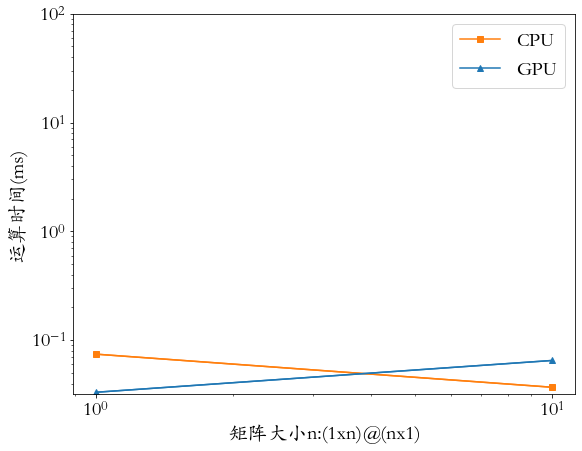

In [4]:
#update
max_pow=2
calc_times=5

for n in range(max_pow):
    n=10**n
    test_accelerate(n,calc_times)

x=[10**i for i in range(max_pow)]
cpu_y=[1000*i for i in cpu_data]
gpu_y=[1000*i for i in gpu_data]
plt.plot(x,cpu_y,'C1')
plt.plot(x,cpu_y,color='C1',marker='s',label='CPU')
plt.plot(x,gpu_y,'C0')
plt.plot(x,gpu_y,color='C0',marker='^',label='GPU')

plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.ylim([0,100])
plt.xlabel('矩阵大小n:(1xn)@(nx1)')
plt.ylabel('运算时间(ms)')
plt.legend()
plt.show()

In [ ]:
import os
pid=os.getpid()
!kill -9 $pid


